In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [157]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    mask = cv2.fillPoly(mask, vertices, 255)
    mask = cv2.bitwise_and(img, mask)
    
    return mask

def draw_line(img, lines):
    img = np.copy(img)
    blank_img = np.zeros(img.shape, dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_img, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
            img = cv2.addWeighted(img, 1, blank_img, 1, 0, 0)
    
    return img

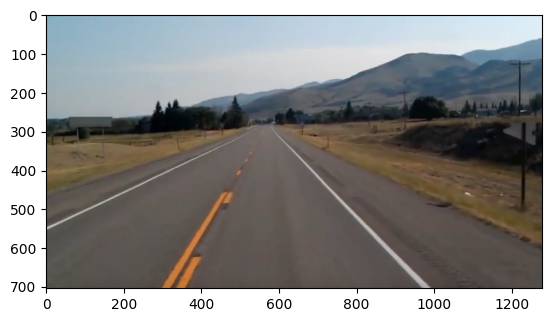

In [158]:
img = cv2.imread("road_lane_sample.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [159]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, 100, 200)

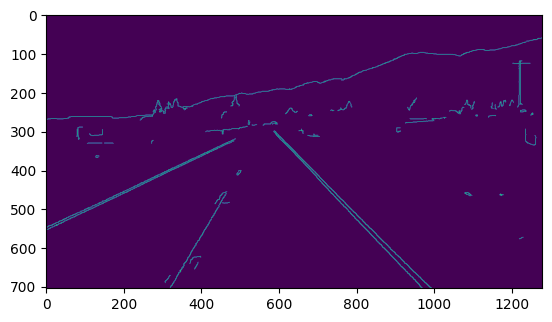

In [160]:
plt.imshow(canny)

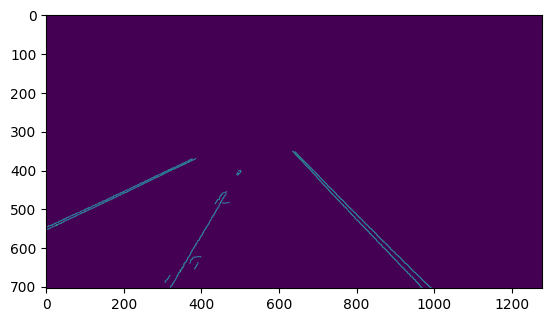

In [161]:
h, w, _ = img.shape
region_of_interest_coor = [(0, h),
                           (0, 400),
                           (w//2, h//2),
                           (w, h)]
points = np.array([region_of_interest_coor])
cropped = roi(canny, points)
plt.imshow(cropped)

In [162]:
lines = cv2.HoughLinesP(cropped, rho=2, theta=np.pi/180, threshold=180,
                        lines=np.array([]), minLineLength=20, maxLineGap=50)
lines


array([[[644, 357, 977, 690]],

       [[711, 434, 963, 695]],

       [[111, 499, 325, 395]],

       [[320, 703, 446, 493]],

       [[  0, 553, 287, 419]],

       [[  0, 547, 377, 372]],

       [[173, 472, 375, 377]],

       [[724, 439, 925, 640]],

       [[  4, 547, 357, 382]]], dtype=int32)

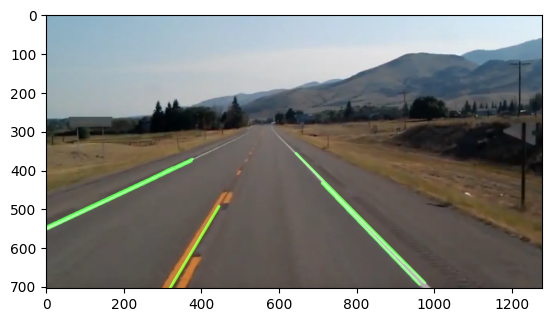

In [163]:
output_img = draw_line(img, lines)
plt.imshow(output_img)